In [1]:
%%bash
# If you are on Google Colab, this sets up everything needed.
!(stat -t /usr/local/lib/*/dist-packages/google/colab > /dev/null 2>&1) && exit
wget -O requirements.txt https://cs7150.baulab.info/2022-Fall/setup/hw1_requirements.txt
pip install -r requirements.txt
# If you are not on Google Colab, you can run these pip requirements on your own command-line.

  Cloning https://github.com/davidbau/baukit (to revision main) to /tmp/pip-install-njhyjqhl/baukit_95bcf34dd3f74a189ec053d3420a2cb1
  Resolved https://github.com/davidbau/baukit to commit 5e23007c02fd58f063200c5dc9033e90f092630d
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Cloning https://github.com/openai/CLIP.git (to revision main) to /tmp/pip-install-njhyjqhl/clip_a906516703f7483a934c574a5069c7ea
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Cl

--2023-09-22 01:26:30--  https://cs7150.baulab.info/2022-Fall/setup/hw1_requirements.txt
Resolving cs7150.baulab.info (cs7150.baulab.info)... 35.232.255.106
Connecting to cs7150.baulab.info (cs7150.baulab.info)|35.232.255.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 578 [application/octet-stream]
Saving to: ‘requirements.txt’

     0K                                                       100%  471M=0s

2023-09-22 01:26:31 (471 MB/s) - ‘requirements.txt’ saved [578/578]

  Running command git clone --filter=blob:none --quiet https://github.com/davidbau/baukit /tmp/pip-install-njhyjqhl/baukit_95bcf34dd3f74a189ec053d3420a2cb1
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-install-njhyjqhl/clip_a906516703f7483a934c574a5069c7ea
  Running command git clone --filter=blob:none --quiet https://github.com/CompVis/taming-transformers.git /tmp/pip-install-njhyjqhl/taming-transformers_2bfd41707b9a4c45ac351aeb5ab7a1

# Homework 1. Foundations, and How to Code in Pytorch

## Learning Objective

The goal of this homework is to get you familar with some of the foundational mathematical and programming tools used in deep learning, so we will review a little bit of calculus and linear algebra and introduce you to the pytorch API.

## Introduction

You may already be familiar with pytorch, and if so, great - dive in to answer the questions below.

If you are new to pytorch, your first step is to get the necessary background.  **Read and work through the notebooks in the [David's tips on how to read pytorch](https://github.com/davidbau/how-to-read-pytorch) series**, which will give you an overview of GPU usage, Autograd, optimizer classes, torch Modules, and data loading.  (Don't hand in those notebooks; no points for working through those other notebooks, though they are highly recommended and will be helpful for learning to answer the questions in the current notebook.) Hand in this current notebook completed.

## Readings

The following readings are not necessary to do this notebook, but you may find them interesting if you want to develop your sense for the origins of some of the important ideas in deep networks.

The practice of modeling a neural network as a computational object was pioneered in this classic paper by Warren McCulloch and Walter Pitts, and we will follow along with some of their constructions envisioning neural networks as graphs that can implement logic:

<a href="https://papers.baulab.info/McCullochPitts-1943.pdf">Warren S. McCulloch and Walter Pitts,
<em>A Logical Calculus of the Ideas Immanent in Nervous Activity</em>, 1943.
</a>

Pytorch is pretty new, but its modular architecture has a long history, with roots in the torch project, which is itself based on the ideas in this paper:

<a href="https://papers.baulab.info/Bottou-1990.pdf">Léon Bottou and Patrick Gallinari,
<em>A Framework for the Cooperation of Learning Algorithms</em>, 1990.
</a>

We will talk about the cross-entropy loss.  The use of cross-entropy loss for neural network training has its roots root in the late-1980s realization that often the units of measurement that should be used by neural networks are units of probability, not only because of its elegance, but also its excellent performance.

<a href="https://papers.baulab.info/Solla-1988.pdf">Sarah Solla, Esther Levin and Michael Fleisher,
<em>Accelerated Learning in Layered Neural Networks</em>, 1988.
</a>

We will play with a state-of-the-art diffusion model that was released recently.  The whole pipeline is complex, and it will take the whole semester to learn how its parts work, but a user's view of the model is descibed well in a blog post here:

<a href="https://huggingface.co/blog/stable_diffusion">Suraj Patil, Pedro Cuenca, Nathan Lambert and Patrick von Platen,
<em>Stable Diffusion with Diffusers</em>, 2022.
</a>

More papers about the diffusion model are listed in that exercise.


## Academic Integrity, Citations, and Collaborations

**In all your homework, you must explicitly cite any sources (people or any materials) you consult.**

In our class homework assignments, you should think about the problems yourself first before consulting outside help.  And when you do seek out help, we strongly advise you to find a fellow classmate to talk with and work together rather than copying an answer from the internet.  You will all learn much more by thinking collaboratively and explaining ideas to one another.

But if you are alone and stuck and you find some really useful insight on Stack Overflow or Github or a blog or some chat channel thread on Discord, it is not cheating to use and learn from that insight <em>if you cite your sources</em>.  Learning from the internet is acceptable as long as you **do not misrepresent somebody else's work as your own**.  Include citations in your writeup text or in comments in your code.

In this first exercise you will Google for a nice solution to a real problem and **make a proper citation of your source for the solution**.  In this specific problem you will only get points if you look it up and cite the source.  In general, avoid Googling and peeking at answers for homework problems, but in this problem we ask you to do it explicitly, and you should continue this practice of citing all your sources and collaborators in the future.  Linked citations are a very cool, polite, honest and useful practice in real life. In classwork, citations are *required*.


## Exercise 1.1: calculus review and autograd derivatives

The pytorch autograd framework is usually used to compute first derivatives, but it is perfectly capable of calculating higher order partial derivatives.  In this exercise we will try it out.

In the code below, a function $p_0(x) =$ `polynomial(x)` $= x^4 - 2 x^3 + 3 x^2 - 4 x + 5$ is given, and it is applied to a batch of 100 values of $x$ in the range $[-2, 3]$ given as `x = torch.linspace(-2.0, 3.0, 100)`.  The batch of 100 values of $p_0(x)$ is stored as `y`, and the results are plotted.

**Question 1.1.1**  **Fill in the formula below.**  Understand why we suggest using gradients of `y.sum()`.

If $y_i = p_0(x_i)$ and $s = \sum_i y_i$, then the gradient $\nabla_x s$ is a vector that has components $\partial s / \partial x_i$, given by:

$$
\frac{\partial s}{\partial x_i} = \boxed{\text{$ 4 x^3_i - 6 x^2_i + 6 x_i - 4$}}
$$

**Question 1.1.2**  Fill in the code below.  To create your ground truth solutions, apply calculus by hand (just use the Power Rule) to compute the derivative of the polynomial, and put the formula in as the definition of `p1(x)`.  Plot the reults.  Do the same for `p2`, `p3` and `p4` for successive derivatives.  To plot results correctly, the results should be a batch of the same size as the input; you might need to use `torch.ones_like(x)` or `x**0` or something similar to make this work in some cases.

Then make pytorch autograd do the work.  Enable gradient computations on `x` by adding the `requires_grad` flag when it is created, and then  modify the line that defines `dy_dx` to uncomment the call to `torch.autograd.grad` and make it work.  Plot the results and make sure it looks the same as `p1`. Add more calls to `torch.autograd.grad` to compute the 2nd, 3rd, and 4th derivatives, and plot the results, and make sure they look right.  The 2nd derivative should come from applying `grad` to the 1st derivative, and so on.  Take a look at the advice about higher-order gradients from the [pytorch documentation for `torch.autograd.grad`](https://pytorch.org/docs/stable/generated/torch.autograd.grad.html#torch.autograd.grad) if you get stuck.

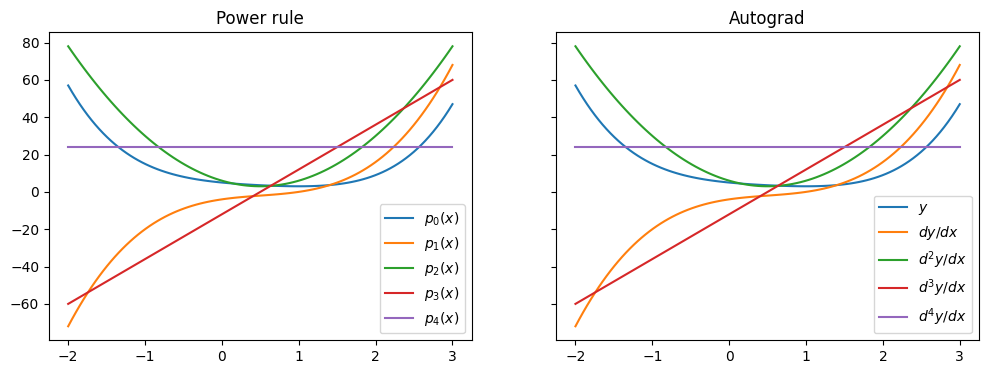

In [2]:
import torch

def polynomial(x):
    return x**4 - 2 * x**3 + 3 * x**2 - 4 * x + 5

# MODIFY THE CODE BELOW TO DEFINE p1, p2, p3, p4 and d2y_x, d3y_x, and d4y_x

def p1(x):
    return 4 * x**3 - 6 * x**2 + 6 * x - 4
def p2(x):
    return 12 * x**2 - 12 * x + 6
def p3(x):
    return 24 * x - 12
def p4(x):
    return 24 + 0 * x

x = torch.linspace(-2.0, 3.0, 100, requires_grad=True)
y = polynomial(x)

[dy_dx] = torch.autograd.grad(y.sum(), x, create_graph=True)
[d2y_dx] = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)
[d3y_dx] = torch.autograd.grad(d2y_dx.sum(), x, create_graph=True)
[d4y_dx] = torch.autograd.grad(d3y_dx.sum(), x, create_graph=True)

# DO NOT CHANGE THE PLOTTING CODE OR TESTS BELOW

import matplotlib.pyplot as plt
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,4), sharey=True)

with torch.no_grad():
    ax1.set_title('Power rule')
    for i in range(0, 5):
        ax1.plot(x, [polynomial, p1, p2, p3, p4][i](x), label=f'$p_{i}(x)$')
    ax1.legend()
    ax2.set_title('Autograd')
    ax2.plot(x, y, label='$y$')
    ax2.plot(x, dy_dx, label='$dy/dx$')
    for i in [2, 3, 4]:
        ax2.plot(x, [d2y_dx, d3y_dx, d4y_dx][i-2], label=f'$d^{i}y/dx$')
    ax2.legend()

assert(all((p1(x) - dy_dx).abs() < 1e-5))
assert(all((p2(x) - d2y_dx).abs() < 1e-5))
assert(all((p3(x) - d3y_dx).abs() < 1e-5))
assert(all((p4(x) - d4y_dx).abs() < 1e-5))


## Exercise 1.2: Softmax, KL, Cross-Entropy, and Squared Error

In the 1980's, researchers like [Sarah Solla](https://papers.baulab.info/Solla-1988.pdf) and [John Hopfield](https://papers.baulab.info/also/Hopfield-1987.pdf) discovered that networks are very effective when trained to model *probabilities* instead of just discrete binary logic.  Even in the case where the output should make a choice between two alternatives, it is often best to have the network output its estimate of the *probability distribution* of the choice to be made, rather than just a 0 or a 1.

So in modern deep learning, we will often pursue the goal of matching some true vector of discrete probabilities $y \in \mathbb{R}^{n}$ by computing some model-predicted vector of probabilities $p \in \mathbb{R}^{n}$ that is derived from some raw neural network output $z \in \mathbb{R}^{n}$, and then measuring its deviation from some true distribution $y$.

This problem of generating a predicted probability distribution $p$ to match some observed truth $y$ is is so central and common in deep networks that you should make sure you are very familiar with the specific clever functions that everybody uses to do it, and why this approach works so well.

The modeling of $p$ and the measurement of the distance to $y$ is almost always done in the same way: **softmax** and **cross-entropy**.

Here is what a the softmax-cross-entropy computation looks like, when modeling a choice between two alternatives:

<img src="https://cs7150.baulab.info/2022-Fall/hw1/softmax-loss.png" width=600>

On the left we have some numbers $z$ that are computed with the intention of modeling some choices in the real world.  On the right we have a categorical probablity distribution $y$ that is the true distribution of the choices actually observed in the world.  (In our figure we have just drawn two choices, but a big model could estimate a distribution over hundreds or thousands of choices.)  In the middle, we have two steps.  First, $p$ is the result of using the "softmax" function to convert the arbitrarily-scaled numbers $z_i$ to nicely-scaled numbers $p_i$ between 0 and 1 that could be interpreted as a categorical probablity distribution.  Then to summarize the difference between the calculated $p$ and the true $y$, some loss $L$ is computed, where $L$ is a single number that will be small if the vectors $p$ and $y$ are close.  When working with categorical probabilities, $L$ is almost always the cross-entropy loss function, but other choices could be used.

Below we introduce both the softmax and the cross-entropy (CE) loss function, and we also compare it to Kullback–Leibler (KL) divergence, as well as squared Euclidean vector distance, which is also known as the squared-error (SE) loss.

**Question 1.2.1**. Jacobians and the the softmax function.

The [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function) $p = \text{softmax}(z) : \mathbb{R}^{n} \rightarrow \mathbb{R}^{n}$ is defined as:

$$\text{softmax}(z)_i = p_i = \frac{e^{z_{i}}}{\sum_{j} e^{z_j}}$$

It is used to convert an vector of arbitrary score numbers $z$ called *logits* into a vector $p$ that is a valid categorical probability distribution.  Fill in the following:

Write the simplest expression for the sum of $\text{softmax}(z)_i$ over all $i$:

$$\sum_i p_i = \sum_i \frac{e^{z_{i}}}{\sum_{j} e^{z_j}} = \boxed{\text{1}}$$
The input to softmax $z$ are called *logits* because they can be thought of as expressing probabilities on a logistic or log scale.  Now suppose we have some new logits $z^*$ which form a vector that is shifted from $z$ by $k$ in all dimensions, where $z^*_i = z_i + k$.  How does such a shift affect the softmax?  Work it out:

Assuming we have $p = \text{softmax}(z)$, write the simplest expression for $p^* = \text{softmax}(z^*) = \text{softmax}(z + k)$ in terms of only the original $p_i$ and $k$:

$$p^*_{i} = \boxed{\text{$p_i$}}$$

This remarkable property means that the output of softmax does not depend so much on the specific values of $z_i$, but on the differences between the $z_i$.

It is useful to know the derivatives of softmax. Remember that the [Jacobian of a vector function](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant) $f(z): \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ is the matrix

$$\mathbf{J}_{f}(z) = \left[\begin{matrix}
\frac{\partial f_1}{\partial z_1} &
\frac{\partial f_1}{\partial z_2} &
... &
\frac{\partial f_1}{\partial z_n} \\
\frac{\partial f_2}{\partial z_1} &
\frac{\partial f_2}{\partial z_2} &
... &
\frac{\partial f_2}{\partial z_n} \\
\vdots & & \ddots & \vdots \\
\frac{\partial f_m}{\partial z_1} &
\frac{\partial f_m}{\partial z_2} &
... &
\frac{\partial f_m}{\partial z_n}
\end{matrix}\right]$$


Work out the Jacobian for softmax in the case where $n=2$, writing the solutions for each partial derivative $\frac{\partial p_i}{\partial z_j}$.  Write each partial derivative in the simplest form in terms of $p_i$ (and try to eliminate $z_i$).  It might be helpful to combine terms by using the fact that $p_1 + p_2$ is a constant.  Try to work it out yourself even though this problem is solved all over the web.  Remember to cite your sources if you get help on the internet or with an AI.


$$\mathbf{J}_{\text{softmax}}(z) =
\mathbf{J}_{p}(z) =
\left[\begin{matrix}
\frac{\partial p_1}{\partial z_1} &
\frac{\partial p_1}{\partial z_2} \\
\frac{\partial p_2}{\partial z_1} &
\frac{\partial p_2}{\partial z_2}
\end{matrix}\right] =
\left[\begin{matrix}
\boxed{\text{$p_1(1 - p_1)$}} &
\boxed{\text{- $p_1p_2$}} \\
\boxed{\text{- $p_2p_1$}} &
\boxed{\text{$p_2(1 - p_2)$}}
\end{matrix}\right]
$$

**Question 1.2.2**. KL divergence, Cross-entropy, and mean squared error loss.

To measure and optimize the goal of matching $p$ to some true real-world distribution $y$, we will need to define some number that summarizes the difference beween $y$ and $p$.  There are several natural possibilities to quantify the difference.  Since both $y$ and $p$ are $n$-dimensional vectors, one natural choice is to look at the squared [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between the two vectors; this is known as the [**squared error** loss](https://en.wikipedia.org/wiki/Mean_squared_error):

$$\text{SE}(y, p) = || y - p ||^2 =  \sum_{i}  (y_i - p_i)^2$$

What is the value of SE if $y = p$?

$$\text{SE}(y, y) = \boxed{\text{0}}$$

What is the partial derivative of $\text{SE}(y, p)$ with respect to the $i$th component $p_i$?  It should be possible to express the answer in terms of just $y_i$ and $p_i$.

$$\frac{\partial \, \text{SE}(y, p)}{\partial p_i} = \boxed{\text{2($p_i - y_i$) }}$$

A different choice for comparing $y$ and $p$ is the famous **KL divergence** ([Wikipedia article here](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)) which is defined as

$$\text{KL}(y; p) = \sum_i y_i \log\frac{y_i}{p_i}$$

What is the value of KL divergence if $y = p$?

$$\text{KL}(y; y) = \boxed{\text{0}}$$

KL divergence can be written as the difference between entropy $\text{H}(y)= \sum_i y_i \log y_i$ and *cross-entropy* $\text{CE}(y; p) = - \sum_i y_i \log p_i$ as follows:

$$\text{KL}(y; p) = \sum_i y_i \log y_i - \sum_i y_i \log p_i = \text{H}(y) + \text{CE}(y; p)$$
$$\text{CE}(y; p) = - \sum_i y_i \log p_i$$

Since $H(y)$ is a constant that does not depend on the model outputs $p$, the shape of the cross-entropy loss is the same as the KL loss, just shifted by a constant.  In particular, when looking at derivatives of negative CE with respect to components of $p$, they are the same as derivatives of KL with respect to components of $p$.  Let us compute some of those derivatives.

What is the partial derivative of $\text{CE}(y; p)$ with respect to the $i$th component $p_i$?  It should be possible to express the answer in terms of just $y_i$ and $p_i$.

$$\frac{\partial \, \text{CE}(y; p)}{\partial p_i} = \boxed{-\frac{y_i}{p_i}}
$$

Convince yourself that this is the same as $\frac{\partial \, \text{KL}(y; p)}{\partial p_i}$.


Let's go further back from $p_i$ and understand partial derivatives with respect to $z_i$.  Remember how the [chain rule works over vector functions](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/differentiating-vector-valued-functions/a/multivariable-chain-rule-simple-version): for example if we wish to compute $\partial L / \partial z_1$, we must consider multiple paths, both the path through $p_1$ and the path through $p_2$.

<img src="https://cs7150.baulab.info/2022-Fall/hw1/two-partial-paths.png" width="320">

**Question 1.2.3**. Gradient of negative CE (or KL) loss on softmax, and gradient of SE loss on softmax.

Using the chain rule to combine answers for 2.3 and 2.4, compute the following partial derivative of cross-entropy with respect to the first component $z_1$.  You should work to find simple expressions in terms of $p_1$ and $y_1$ instead of making a messy expression with the $z_i$.  To simplify terms, you may find it useful to remember thet $y_1 + y_2 = 1$ and $p_1 + p_2 = 1$.

$$\frac{\partial \, \text{CE}(y; p)}{\partial z_1} = \boxed{\text{$(p_1 - y_1)$}}$$

Try to work it out on your own.  If you consult the internet, please add a citation.

Next, compute the analogous partial derivative of SE with repect to $z_1$.  Again, keep the expression as simple as you can, using only $y_1$ and $p_1$ if you can.  Hint: it is a polynomial that can be written as the product of three terms.

$$\frac{\partial \, \text{SE}(y, p)}{\partial z_1} = \boxed{\text{4$p_1(1 - p_1$)($p_1 - y_1$)}}$$

Negative CE and SE applied to softmax have a lot of similarities, but they have some significant differences in their derivatives.

Let us visualize these derivatives.

Read and run the code below and interact with the widget.  It shows how the KL, CE, and SE loss vary as a function of the logits.  If you click on the CE checkbox, you can see how negative cross entropy is parallel to the KL loss curve.


Also notice how SE is very different from KL. In particular, notice how SE loss suffers from **vanishing graidents**: it saturates in regions where the predicted answer $p$ is far from the true answer $y$.  The flatness of the SE loss means that it does not really distinguish between the quality of bad answers, and it can be hard to use SE as a guide to improve a bad answer.

Also, notice that when the target probability $y$ is imbalanced, e.g., $y=0.1$, then SE is also noticably flatter than KL at the point of minimum loss, with a much flatter curvature.  That means that SE is very accepting of not-very-good answers whereas KL does a better job at distinguishing very-good answers from slightly less-good answers.

**Question 1.2.4**. Plot and compare the partial derivatives of KL, and SE on softmax as well.

In the code below, the plot on the right is incomplete because it does not include the correct plot of partial dervatives for KL and SE losses.  Copy your answers from 3.3 into the proper lines of the code below to visualize the derivatives as well.

Notice that CE has exactly the same shape as KL.

The plots you make explain why cross-entropy loss typically works much better than SE in practice.  While both KL and SE are flat at the optimal point, unlike KL, SE flattens out again when the logits are far from the optimal point.  We say that SE *saturates* and suffers from a *vanishing gradient* when the system is far from the optimum.  Optimizations behave like a rolling stone: if you were to put a stone on the SE loss curve, it could easily get stuck in the high flat area of the curve.  Whereas if you put a stone on the the KL loss curve, it would be on a steeper slope and roll quickly to the bottom.

In [3]:
from baukit import PlotWidget, Range, Checkbox, show
import math

xmin, xmax = -6.0, 6.0
z = torch.stack([
    torch.zeros(201),
    torch.linspace(xmin, xmax, 201),
])
p = torch.softmax(z, dim=0)

def compare_loss(fig, y1=0.5, dokl=True, dose=True, doce=True, dol1=True):
    [ax1] = fig.axes
    y0 = 1.0 - y1
    kl = y0 * (math.log(y0) - torch.log(p[0])) + y1 * (math.log(y1) - torch.log(p[1]))
    ce = y0 * ( - torch.log(p[0])) + y1 * ( - torch.log(p[1]))
    se = ((p - torch.tensor([y0, y1])[:, None])**2).sum(0)
    # sampled_se = (y0 * ((1-p[0])**2 + p[1]**2)) + (y1 * ((1-p[1])**2 + p[0]**2))
    sampled_l1 = (2*y0*p[1] + 2*y1*p[0])
    ax1.clear()
    ax1.set_ylim(0, 3.0)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Difference between logits $z_1 - z_0$')
    ax1.set_title(f'Loss curve on softmax when target $y_1={y1:.3f}$')

    if dokl: ax1.plot(z[1], kl, label='KL', color='b')
    if dose: ax1.plot(z[1], se, label='SE', color='r')
    if doce: ax1.plot(z[1], ce, label='CE', color='g', linestyle='dashed', alpha=0.6)
    if dol1: ax1.plot(z[1], sampled_l1, label='L1', color='orange', linestyle='dotted', alpha=0.7)
    if dokl or dose or doce or dol1: ax1.legend()

def compare_grad(fig, y1=0.5, dokl=True, dose=True):
    [ax1] = fig.axes
    y0 = 1.0 - y1
    dkl_dz1 = (p[1] - y1)
    dse_dz1 = 4 * p[1] * (1 - p[1]) * (p[1] - y1)
    ax1.clear()
    ax1.set_ylim(-0.7, 0.7)
    ax1.set_xlim(xmin, xmax)
    ax1.set_xlabel('Difference between logits $z_1 - z_0$')
    ax1.set_title(f'Gradient of loss with repect to $z_1$ when $y_1={y1:.3f}$')

    if dokl:
        ax1.plot(z[1], dkl_dz1, color='b', label=r'$\frac{\partial \mathrm{KL}}{\partial z_1}$' +
            r'=$- \frac{\partial \mathrm{CE}}{\partial z_1}$')
    if dose:
        ax1.plot(z[1], dse_dz1, color='r', label=r'$\frac{\partial \mathrm{SE}}{\partial z_1}$')
    ax1.axhline(0, color='gray', linewidth=0.5)
    if dokl or dose:
        ax1.legend(loc='upper left')

rw = Range(min=0.001, max=0.999, step=0.001, value=0.5)
bkl = Checkbox('KL', value=True)
bce = Checkbox('CE', value=False)
bse = Checkbox('SE', value=True)
bl1 = Checkbox('L1', value=False)
ploss = PlotWidget(compare_loss, y1=rw.prop('value'),
                   dokl=bkl.prop('value'), dose=bse.prop('value'),
                   doce=bce.prop('value'), dol1=bl1.prop('value'),
                   bbox_inches='tight')
pgrad = PlotWidget(compare_grad, y1=rw.prop('value'),
                   dokl=bkl.prop('value'), dose=bse.prop('value'),
                   bbox_inches='tight')
show([[show.raw_html('<div>target y<sub>1</sub> = </div>'),
                       show.style(flex=12), rw,
                       'Include:', bkl, bce, bl1, bse],
                      [ploss, pgrad]])

## Exercise 1.3: loading and using a pretrained SOTA model

Pytorch `Modules` make it easy to save, load, train, and use functions that are parameterized by lots of learned numbers.  In this exercise you will load a big state-of-the art deep network model and use it.  Do **not** worry that you do not understand how the specific model works or how it was trained.  We will be covering the concepts in the course, and if you would like to spend the semester understanding a specific state-of-the-art system like this, you can choose it for your final project.

To see how this would work in the real world, we will use [Hugging Face](https://huggingface.co/), which a platform being developed by an AI startup to host pretrained models.

**First, sign up** for a free huggingface.co account at https://huggingface.co/join if you don't already have one.

**Second, log in.** After you have signed up, you need to set up a login authentication key with your notebook by running the following notebook cell.  This will allow your code to download some models through your account.  When it prompts you to go to https://huggingface.co/settings/tokens it is enough to create a "Read" token for this homework.


In [4]:
from huggingface_hub import notebook_login
notebook_login()

**Third, download the Stable Diffusion model pipeline** by running the following cell.  Stable Diffusion is very new, and these models were released on August 22, 2022.  Read this blog entry about it: https://huggingface.co/blog/stable_diffusion

You do **not** need to understand the following citations.  The code we are downloading is by [Suraj Patil and others at Huggingface](https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py), and it implements text-conditioned diffusion modeling to a VAE latent space, as devised by [Robin Rombach, Andreas Blattmann, Dominik Lorenz, Patrick Esser and Björn Ommer, "High-Resolution Image Synthesis with Latent Diffusion Models" (Latent Diffusion, CVPR 2022, https://arxiv.org/abs/2112.10752)](https://arxiv.org/abs/2112.10752) and trained by [stability.ai](https://stability.ai/blog/stable-diffusion-announcement).  The method directly builds on work by [Ho, et al (Denoising Diffusion, 2020)](https://papers.baulab.info/Ho-2020.pdf), [Radford, et al. CLIP 2021](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf), [Ho and Salimans (Classifier-free guidance, 2022)](https://arxiv.org/abs/2207.12598), [Ramesh, et al (Dall-E 2, 2022)](https://cdn.openai.com/papers/dall-e-2.pdf), [Saharia, et al (Imagen, 2022)](https://imagen.research.google/paper.pdf), and [Crowson (PLMS k-diffusion, 2022)](https://github.com/crowsonkb/k-diffusion).

If the pipeline seems complex, be aware that the ideas did not all come from one person.

The following cell will take a few minutes to download the models.  Running on a GPU machine is highly recommended.


In [5]:
import torch
from diffusers import StableDiffusionPipeline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# This function loads several neural networks to use together.
# The individual networks and preprocessors loaded are listed in this file:
# https://huggingface.co/CompVis/stable-diffusion-v1-4/blob/main/model_index.json
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    revision="fp16",
    torch_dtype=torch.float16,
    use_auth_token=True
).to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


**Question 1.3.1**.

The following cell lists the objects contained in the loaded pipeline; some of these objects are neural networks and some are not.  Modify the cell below to figure out which of the four objects are neural networks (i.e., they extend `torch.nn.Module`) and then use `Module` methods to count how many submodules each one contains, how many Tensor parameters, and within those parameters, how many scalar parameters are within each network.

Write the code to figure it out and include it in the following cell.

Also, in answers into the following table.  One row is already given.

| Attribute             | Type                         | Modules | Tensor params | Scalar params |
| :-------------------- | :--------------------------- | ------- | --------------| ------------- |
| `pipe.vae`                  |               AutoencoderKL              |    243    |       248       |        83,653,863      |
| `pipe.text_encoder`                  |               CLIPTextModel              |    152    |       196       |        123,060,480      |
| `pipe.unet`                  |               UNet2DConditionModel              |    709    |       686       |        859,520,964      |
| `pipe.safety_checker` | StableDiffusionSafetyChecker |   299   |      396      |   303,981,588 |


In [6]:
for name, obj in vars(pipe).items():
    print(f'pipe.{name}')

pipe._internal_dict
pipe.vae
pipe.text_encoder
pipe.tokenizer
pipe.unet
pipe.scheduler
pipe.safety_checker
pipe.feature_extractor
pipe.vae_scale_factor
pipe.image_processor


In [7]:
import torch.nn as nn

for name, obj in vars(pipe).items():
    if isinstance(obj, nn.Module):
        obj_type = type(obj).__name__
        num_modules = len(list(obj.modules()))
        num_tensor_params = sum(1 for p in obj.parameters() if p.dim() != 0)
        num_scalar_params = sum(p.numel() for p in obj.parameters() if p.requires_grad)

        print(f"\nObj '{name}' is a neural network:\n")
        print(f"Type: pipe.{name} | {obj_type}")
        print(f"  - No of modules: {num_modules}")
        print(f"  - No of Tensor params: {num_tensor_params}")
        print(f"  - No of Scalar params: {num_scalar_params}")
        print()
    else:
        print(f"\nObj '{name}' is not a neural network.")


Obj '_internal_dict' is not a neural network.

Obj 'vae' is a neural network:

Type: pipe.vae | AutoencoderKL
  - No of modules: 243
  - No of Tensor params: 248
  - No of Scalar params: 83653863


Obj 'text_encoder' is a neural network:

Type: pipe.text_encoder | CLIPTextModel
  - No of modules: 152
  - No of Tensor params: 196
  - No of Scalar params: 123060480


Obj 'tokenizer' is not a neural network.

Obj 'unet' is a neural network:

Type: pipe.unet | UNet2DConditionModel
  - No of modules: 709
  - No of Tensor params: 686
  - No of Scalar params: 859520964


Obj 'scheduler' is not a neural network.

Obj 'safety_checker' is a neural network:

Type: pipe.safety_checker | StableDiffusionSafetyChecker
  - No of modules: 299
  - No of Tensor params: 396
  - No of Scalar params: 303966208


Obj 'feature_extractor' is not a neural network.

Obj 'vae_scale_factor' is not a neural network.

Obj 'image_processor' is not a neural network.


Now run the code below.  You will likely need a GPU-enabled machine to run it.

You **do not** need to understand every line, but if you are curious what is going on, [this blog entry about the stable diffusion code](https://huggingface.co/blog/stable_diffusion) is informative.

Try it with your own prompts.  Can you come up with any interesting insights?

In [8]:
from baukit import show, renormalize, pbar
from torch import autocast
import numpy

prompt = "a photograph of an astronaut riding a horse"
seed = 1

# Stable Diffusion inference devised by Robin Rombach et al. (CVPR 2022, https://arxiv.org/abs/2112.10752)
# Derived from the Huggingface Stable Diffusion pipeline by Suraj Patil and others
# https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py#L16-L171
with autocast(device), torch.no_grad():
    text_tokens = pipe.tokenizer(["", prompt], padding="max_length", return_tensors="pt")['input_ids']
    text_vectors = pipe.text_encoder(text_tokens.to(device))[0]
    image_vectors = torch.from_numpy(numpy.random.RandomState(seed).randn(1, 4, 64, 64)).float().to(device)

    # The scheduler uses a linear multistep (PLMS) method proposed by Katherine Crowson
    # https://github.com/crowsonkb/k-diffusion
    scheduler = pipe.scheduler
    scheduler.set_timesteps(33)
    latent_scale = 0.18215
    guidance_strength = 5.0
    intermediates = []
    for i, t in enumerate(pbar(scheduler.timesteps)):
        if i % 6 == 0:
            intermediates.extend(renormalize.as_image(pipe.vae.decode(image_vectors / latent_scale).sample))
        # Pass two copies into the network, one to process with "" and the other with prompt.
        image_vector_input = torch.cat([image_vectors] * 2)
        # pipe.unet is a neural network inputs image_vector_inputs and text_vectors and outputs some updates
        update = pipe.unet(image_vector_input, t, text_vectors)["sample"]
        # Classifier-free guidance: see Jonathan Ho and Tim Salimans
        # (Neurips 2021 Workshop, https://arxiv.org/abs/2207.12598)
        strong_guidance = update[0] + guidance_strength * (update[1] - update[0])
        image_vectors = scheduler.step(strong_guidance, t, image_vectors)["prev_sample"]

    # pipe.vae is a neural network
    rgb_vectors = pipe.vae.decode(image_vectors / latent_scale).sample
    intermediates.extend(renormalize.as_image(rgb_vectors))
    show(show.WRAP, [[show.style(width=144), im] for im in intermediates])


Output hidden; open in https://colab.research.google.com to view.

**Question 1.3.2**.

Data flows through the pipeline in four tensors: `text_tokens`, `text_vectors`, `image_vectors`, and `rgb_vectors`.

Write some code below to check the `shape` and `dtype` for each of these tensors, and then determine the role of each of the tensor dimensions.  Then fill in the following table.

**Enter your answers into this table**

| Tensor           | Dtype      |       Shape |   numel | batch size | feature size, if any | spatial size, if any |
| :--------------- | :--------- | ----------- | --------| ---------- | -------------------- | -------------------- |
| `text_tokens`    | int64          |           2 x 77 |       154 |          2 |                    [77] |                    N/A |
| `text_vectors`   | float32          |           2 x 77 x 768 |       118,272 |          2 |                    [768] |                    77 |
| `image_vectors`  | float32          |           1 x 4 x 64 x 64  |       16,384 |          1 |                    [4] |                    64(x) x 64(y) |
| `rgb_vectors`    | float16    | 1 x 3 x 512 x 512 | 786,432 |          1 |              3 (RGB) |    512 (y) x 512 (x) |

In [15]:
# Use this cell to write test code to check the size, type, and meaning of each tensor dimension

print(f"text_tokens: Dtype: {text_tokens.dtype}, Shape: {text_tokens.shape}, "
      f"Batch Size: {text_tokens.shape[0]}, numel: {text_tokens.numel()}, "
      f"Feature Size: {text_tokens.shape[1:]}, Spatial Size: N/A")

print(f"text_vectors: Dtype: {text_vectors.dtype}, Shape: {text_vectors.shape}, "
      f"Batch Size: {text_vectors.shape[0]}, numel: {text_vectors.numel()}, "
      f"Feature Size: {text_vectors.shape[2]}, Spatial Size: {text_vectors.shape[1]}")

print(f"image_vectors: Dtype: {image_vectors.dtype}, Shape: {image_vectors.shape}, "
      f"Batch Size: {image_vectors.shape[0]}, numel: {image_vectors.numel()}, "
      f"Feature Size: {image_vectors.shape[1:]}, Spatial Size: {image_vectors.shape[2:]}")

print(f"rgb_vectors: Dtype: {rgb_vectors.dtype}, Shape: {rgb_vectors.shape}, "
      f"Batch Size: {rgb_vectors.shape[0]}, numel: {rgb_vectors.numel()}, "
      f"Feature Size: {rgb_vectors.shape[1:]}, Spatial Size: {rgb_vectors.shape[2:]}")

text_tokens: Dtype: torch.int64, Shape: torch.Size([2, 77]), Batch Size: 2, numel: 154, Feature Size: torch.Size([77]), Spatial Size: N/A
text_vectors: Dtype: torch.float32, Shape: torch.Size([2, 77, 768]), Batch Size: 2, numel: 118272, Feature Size: 768, Spatial Size: 77
image_vectors: Dtype: torch.float32, Shape: torch.Size([1, 4, 64, 64]), Batch Size: 1, numel: 16384, Feature Size: torch.Size([4, 64, 64]), Spatial Size: torch.Size([64, 64])
rgb_vectors: Dtype: torch.float16, Shape: torch.Size([1, 3, 512, 512]), Batch Size: 1, numel: 786432, Feature Size: torch.Size([3, 512, 512]), Spatial Size: torch.Size([512, 512])


## Exercise 1.4: use a dataloader and run a NSFW filter

The Stable Diffusion pipeline comes with a NSFW filter neural network called `safety_checker`.

In this exercise, you will test out this network by passing 1000 images to it.

Like most pytorch neural networks, this network is configured to run on *batches* of data.  You will pass the images to the network in batches of 10, using a DataLoader with `batch_size=10`.

The code below downloads a small classroom dataset called `coco_humans` of *individual* images.

In [8]:
import os
from torchvision.datasets.utils import download_and_extract_archive

if not os.path.isdir('coco_humans'):
    download_and_extract_archive('https://cs7150.baulab.info/2023-Fall/data/coco_humans.zip', 'coco_humans')

100%|██████████| 39144514/39144514 [00:03<00:00, 9860033.43it/s] 


Extracting coco_humans/coco_humans.zip to coco_humans


Here is some information about the `safety_checker` neural network.

In pytorch, a neural network is a `torch.nn.Module`, and every `torch.nn.Module` is a *callable* object that can be called just like a function.

To see how to call `pipe.safetey_checker` you can consult the original Stable Diffusion code that calls it:  https://github.com/huggingface/diffusers/blob/main/src/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion.py#L166

```image, has_nsfw_concept = self.safety_checker(images=image, clip_input=safety_cheker_input.pixel_values)```


Specifically, the `safety_checker` network is expecting two inputs when it is called.

The second `clip_input` argument is quite typical and conventional for a vision network.  It is a read-only 4-dimensional pytorch tensor that should contain the number data for a batch of normalized RGB images that the network will examine for possible offensive images.

To pass a batch of 10 images as `clip_input`, you will need to normalize the data correctly - that is, you will need to paticular minimum and maximum numbers to represent the range from black pixels to white pixels, and you will want to use the same range that the network expects.  Since this is a "CLIP" network, it expects CLIP standard normalization as defined in the `clip_transform` in the code below (source is cited in the code).  Check the `torchvision.datasets.ImageFolder` documentation about how to use an image transform like this when loading data.

The first `safety_checker` argument, `images`, is pretty unusual for a neural network, and we can almost ignore it.  It is a mutable list of tensors for the image data, which the network will use to alter the original images to black out any suspected NSFW regions. (Most neural networks don't do mutations that alter their input data.)  Since we're not interested in blacking out anything for our test, we would prefer to ignore this argument, but it has to be supplied, so in the code below we create a `numpy_list` which you can provide as `images=numpy_list`, and then which you can then ignore.

**Question 1.4.1**

Complete the code below to find any images in the `coco_humans` data set that are flagged by `safety_checker`.
 * Pass numpy_list and a single 10x3x224x224 pytorch tensor, correctly normalized, each time you call `pipe.safety_checker`.
 * You might need to make sure the tensor has a device data type that matches the network.
 * If any of the has_nsfw_concept flags come back `True`, then print the specific image number and display the image.

Some hints and sanity checks: It is not a classification dataset, so all the data items have the same class number according to `ImageFolder`.  It should say that 1000 images are available in the data set; and if you examine image number 213 in the data set, you should see a slalom skiier.  A small handful of images will be flagged, including image number 162.  To display a flagged image, you could conver it back to a PIL image, or you could just create a second ImageFolder dataset, one for getting PIL image objects, and one for getting tensors.



1000 images available


Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  65


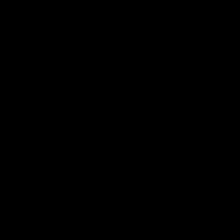

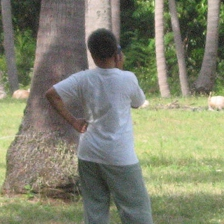

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  71


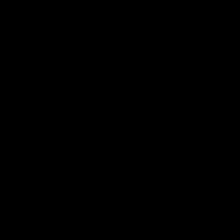

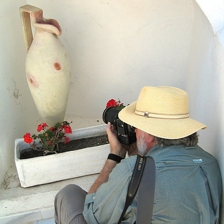

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  162


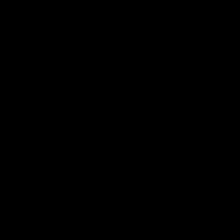

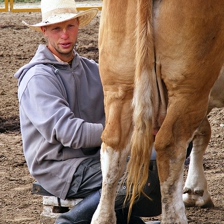

Index:  166


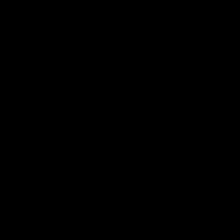

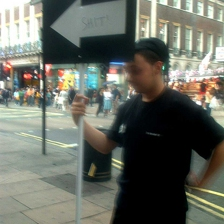

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  392


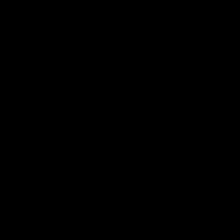

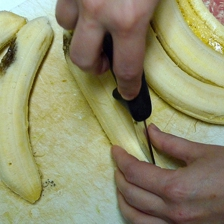

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  432


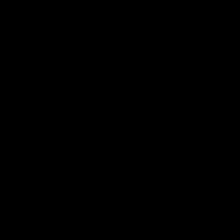

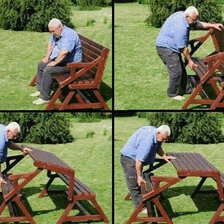

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  440


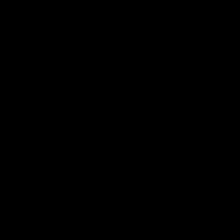

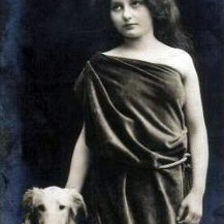

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  572


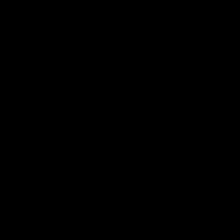

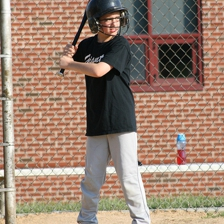

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  626


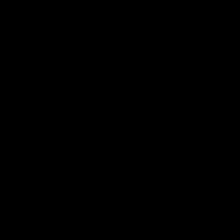

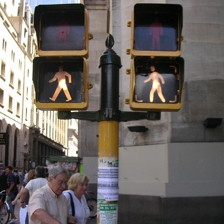

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  928


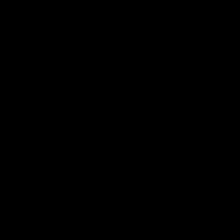

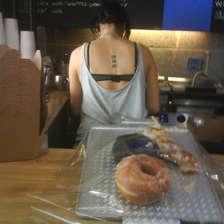

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Index:  964


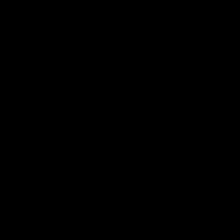

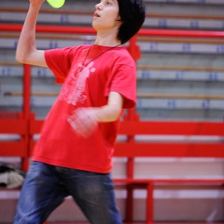


Total flagged images:  11


In [10]:
from torchvision.transforms import Compose, Normalize, ToTensor, ToPILImage
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

image_dataset = ImageFolder('coco_humans')
print(len(image_dataset), 'images available')

# CLIP net standard normalization puts numerical image data in a range
# with zero mean and unit variance based on empirical data. Source:
# https://github.com/openai/CLIP/blob/c5478aac7b9/clip/clip.py#L85

clip_transform = Compose([
    ToTensor(),
    Normalize([0.48145466, 0.4578275, 0.40821073],
              [0.26862954, 0.26130258, 0.27577711]),
])

image_dataset_transform = ImageFolder('coco_humans', transform = clip_transform)

batch = 0
flagged = 0

# Fix this, but leave the batch_size as 10.
for [image_batch, class_numbers] in DataLoader(image_dataset_transform, batch_size=10):
    numpy_list = [im.numpy() for im in image_batch]

    # Perform safety checking with the CLIP model (assuming you have 'pipe' properly defined)
    # Replace 'pipe' with your actual safety checker
    image, has_nsfw_concept = pipe.safety_checker(images=numpy_list, clip_input=image_batch.cuda().half())

    for index, (im, has_nsfw) in enumerate(zip(image, has_nsfw_concept)):
        if has_nsfw:
            flagged += 1
            print("Index: ", batch + index)

            pil_img = ToPILImage()(torch.Tensor(im))
            display(pil_img, image_dataset[batch + index][0])
    batch += 10

print("\nTotal flagged images: ", flagged)

**Problem 1.4.2**

Fill in the following answers:

In the `coco_humans` dataset, the Stable Diffusion safety checker found $\boxed{\text{11}}$ unsafe images and when looking at them actually $\boxed{\text{3}}$ were offensive.  When automatic machine-leaned filters are used to omit data, they are typically used with the intention of reducing the chance of propagating offensive or illegal content.  What other potential benefits or drawbacks do you see to using a neural network to filter content?

Benefits: One significant benefit of using a neural network to filter content is identification of harmful content and thus control the propagation and spread of offensive and illegal content.

Drawbacks: A notable drawback of relying on neural network content filters is the potential for false positives i.e. too many incorrect labelings. Since models can inherit biases due to a lack of ability to understand context fully making it challenging to distinguish between harmless and offensive content.
    
    

## Backpropagation

For part 2 of the homework, proceed to the next notebook.